# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Meila Adisty Putri
- **Email:** meila88putri@gmail.com
- **ID Dicoding:** xza_yay

# Menentukan Pertanyaan Bisnis



- Seberapa besar persentase pengaruh kondisi cuaca terhadap jumlah customer dalam menyewa sepeda?

- Bagaimana pola penyewaan sepeda di tahun 2012, apakah customer casual atau registered yang lebih banyak?

## Import Semua Packages/Library yang Digunakan

Langkah pertama yaitu menghubungkan dengan GDrive, di mana dataset tersebut disimpan.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Setelah terhubung, file yang akan digunakan bisa diakses secara langsung.

In [2]:
# mengimport semua library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Ditahap ini, saya mengumpulkan data dan memilih bike sharing dataset, lalu mengimpor file day.csv dan hour.csv

In [3]:
day_df = pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset.zip (Unzipped Files)/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset.zip (Unzipped Files)/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Pada tahap ini, memeriksa data tiap kolom dalam day_df dan hour_df

In [5]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [6]:
# memeriksa apakah terdapat missing value di day_df
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Tidak terdapat missing value pada day_df

In [7]:
# memeriksa apakah terdapat missing value di hour_df
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Tidak ada missing value di hour_df

In [8]:
print("Jumlah duplikasi day_df: ", day_df.duplicated().sum())
print("Jumlah duplikasi hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi day_df:  0
Jumlah duplikasi hour_df:  0


Kita dapat melihat bahwa tidak terdapat duplikasi data.

In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
day_df = day_df.reset_index(drop=True)

total_sewa_sepeda = hour_df[['casual', 'registered']].sum()
print(total_sewa_sepeda)

total_sewa_sepeda= day_df[['casual', 'registered']].sum()
print(total_sewa_sepeda)

total_all_sewa = total_sewa_sepeda['casual'] + total_sewa_sepeda['registered']
print(total_all_sewa)

casual         620017
registered    2672662
dtype: int64
casual         620017
registered    2672662
dtype: int64
3292679


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

1. Mengubah keterangan pada nama kolom



In [12]:
day_df.rename(columns={'dteday':'date_day','yr':'year','mnth':'month','hum':'humidity','cnt':'count'},inplace=True)

In [13]:
hour_df.rename(columns={'dteday':'date_day','hr':'hour','yr':'year','mnth':'month','hum':'humidity','cnt':'count'},inplace=True)

In [14]:
# mengubah angka menjadi keterangan
day_df.weathersit.replace((1,2,3,4), ('Clear/partly cloudy','Mist','LightSnow','Severe Weather'), inplace=True)
hour_df.weathersit.replace((1,2,3,4), ('Clear/partly cloudy','Mist','LightSnow','Severe Weather'), inplace=True)

day_df.weekday.replace((0,1,2,3,4,5,6), ('Sun','Mon','Tues','Wedn','Thurs','Fri','Sat'), inplace=True)
hour_df.weekday.replace((0,1,2,3,4,5,6), ('Sun','Mon','Tues','Wedn','Thurs','Fri','Sat'), inplace=True)

day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'), inplace=True)


2. Mengubah tipe data

In [15]:
# Mengubah object (dteday) menjadi datetime
hour_df['date-day'] = pd.to_datetime(hour_df['date_day'])
day_df['date_day'] = pd.to_datetime(day_df['date_day'])

In [16]:
# Mengubah tipe data menjadi kategorikal
columns = ['season', 'month', 'year', 'workingday', 'holiday', 'weekday', 'weathersit']
for column in columns:
    hour_df[column] =  hour_df[column].astype("category")
    day_df[column] =  day_df[column].astype("category")

In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date_day    731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   year        731 non-null    category      
 4   month       731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  humidity    731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: category(7), datetime64

In [18]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date_day    17379 non-null  object        
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  category      
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

## Exploratory Data Analysis (EDA)

### Explore data day_df

In [19]:
day_df.describe(include="all")

,instant,date_day,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731,731,731,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Aug,0.0,Mon,1.0,Clear/partly cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [20]:
# melihat jumlah penyewa berdasarkan bulan
day_df.groupby(by='month').agg({'count': ['max', 'min', 'mean', 'sum']})

<ipython-input-20-2d3393aed687>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='month').agg({'count': ['max', 'min', 'mean', 'sum']})


count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
July   8173  3285  5563.677419  344948
June   8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

Berdasarkan hasil diatas diketahui rata-rata yang menyewa sepeda terbesar di bulan Juni dan rata-rata terkecil di bulan Januari.

In [21]:
# melihat jumlah penyewa berdasarkan season/musim
day_df.groupby(by='season').agg({'registered': 'mean', 'casual': 'mean', 'count': ['max', 'min', 'mean']})

<ipython-input-21-a29b874907df>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({'registered': 'mean', 'casual': 'mean', 'count': ['max', 'min', 'mean']})


registered       casual count                   
               mean         mean   max   min         mean
season                                                   
Fall    4441.691489  1202.611702  8714  1115  5644.303191
Spring  2269.204420   334.928177  7836   431  2604.132597
Summer  3886.233696  1106.097826  8362   795  4992.331522
Winter  3999.050562   729.112360  8555    22  4728.162921

Berdasarkan hasil di atas dilihat dari rata-rata, total penyewa sepeda terbanyak di musim Fall/Gugur, total penyewa terkecil di musim spring/semi.

In [22]:
# melihat jumlah penyewa berdasarkan weathersit/cuaca
day_df.groupby(by='weathersit').agg({'registered': 'mean', 'casual': 'mean', 'count': ['max', 'min', 'mean']})

<ipython-input-22-ad860726556c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weathersit').agg({'registered': 'mean', 'casual': 'mean', 'count': ['max', 'min', 'mean']})


registered      casual count                  
                            mean        mean   max  min         mean
weathersit                                                          
Clear/partly cloudy  3912.755940  964.030238  8714  431  4876.786177
LightSnow            1617.809524  185.476190  4639   22  1803.285714
Mist                 3348.510121  687.352227  8362  605  4035.862348

Berdasarkan hasil diatas, jumlah penyewa sepeda terbanyak ketika cuaca cerah dan jumlah terkecil ketika cuaca sedang salju.

In [23]:
# Melihat jumlah penyewa berdasarkan year/tahun
day_df.groupby(by="year").agg({"casual": ["sum"],"registered": ["sum"]})

<ipython-input-23-2ad6ce95a25f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="year").agg({"casual": ["sum"],"registered": ["sum"]})


,casual,registered
,sum,sum
year,,
2011,247252,995851
2012,372765,1676811


Berdasarkan hasil di atas, total penyewa sepeda terbanyak di tahun 2011 yakni registered, dan total terkecil yakni casual. Sedangkan di tahun 2012 memiliki jumlah terbanyak registered dan terkecil casual  

In [24]:
# Menghitung total 'casual' dan 'registered'
casual_total = day_df['casual'].sum()
registered_total = day_df['registered'].sum()

# Menghitung persentase
persentase_by_casual = (casual_total / (casual_total + registered_total)) * 100
persentase_by_registered = (registered_total / (casual_total + registered_total)) * 100

print("Casual =", persentase_by_casual, "%")
print("Registered =", persentase_by_registered, "%")

Casual = 18.830168382645258 %
Registered = 81.16983161735475 %


## Visualization & Explanatory Analysis

### Pertanyaan 1: Seberapa besar persentase pengaruh kondisi cuaca terhadap jumlah customer dalam menyewa sepeda?

<ipython-input-25-d5600aa9cfe8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = day_df.groupby('weathersit').sum(numeric_only=True).reset_index()
<ipython-input-25-d5600aa9cfe8>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sewa_by_weathersit = day_df.groupby('weathersit')['total_all_sewa'].sum()


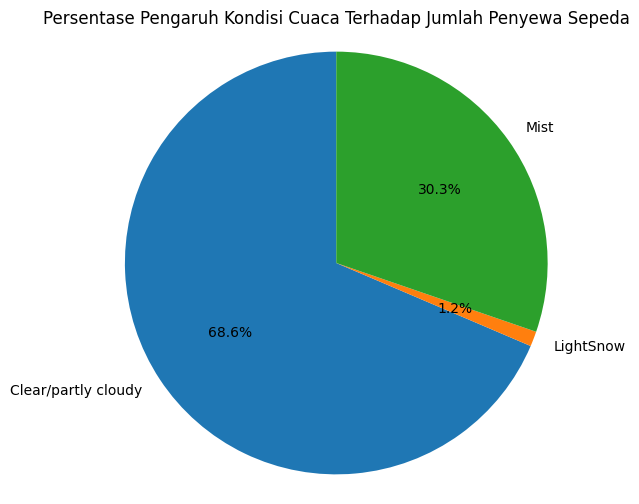

In [25]:
data = day_df.groupby('weathersit').sum(numeric_only=True).reset_index()

# Menghitung total jumlah penyewa per cuaca
casual_total = day_df['casual'].sum()
registered_total = day_df['registered'].sum()

day_df['total_all_sewa'] = day_df['casual'] + day_df['registered']

# Menghitung total jumlah penyewa per cuaca
sewa_by_weathersit = day_df.groupby('weathersit')['total_all_sewa'].sum()

# Menghitung persentase penyewa per cuaca
percent_by_weathersit = (sewa_by_weathersit / day_df['total_all_sewa'].sum()) * 100

plt.figure(figsize=(6,6))
plt.pie(percent_by_weathersit, labels=sewa_by_weathersit.index, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Pengaruh Kondisi Cuaca Terhadap Jumlah Penyewa Sepeda')
plt.axis('equal')
plt.show()

Gambar di atas menunjukkan bahwa persentase pengaruh cuaca yang mendominasi yaitu cuaca clear/partly cloud sebesar 68.6%, kedua yaitu mist sebesar 30.3%, ketiga lightsnow sebesar 1.2%.  

### Pertanyaan 2: Bagaimana pola penyewaan sepeda di tahun 2012, apakah customer casual atau registered yang lebih banyak?

<ipython-input-26-abedcabfd976>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sewa = day_df.groupby('month')[['casual', 'registered']].sum()


Monthly Sewa Data:
        casual  registered
month                    
Jan     12042      122891
Feb     14963      136389
Mar     44444      184476
Apr     60802      208292
May     75285      256401
June    73906      272436
July    78157      266791
Aug     72039      279155
Sep     70323      275668
Oct     59760      262592
Nov     36603      218228
Dec     21693      189343


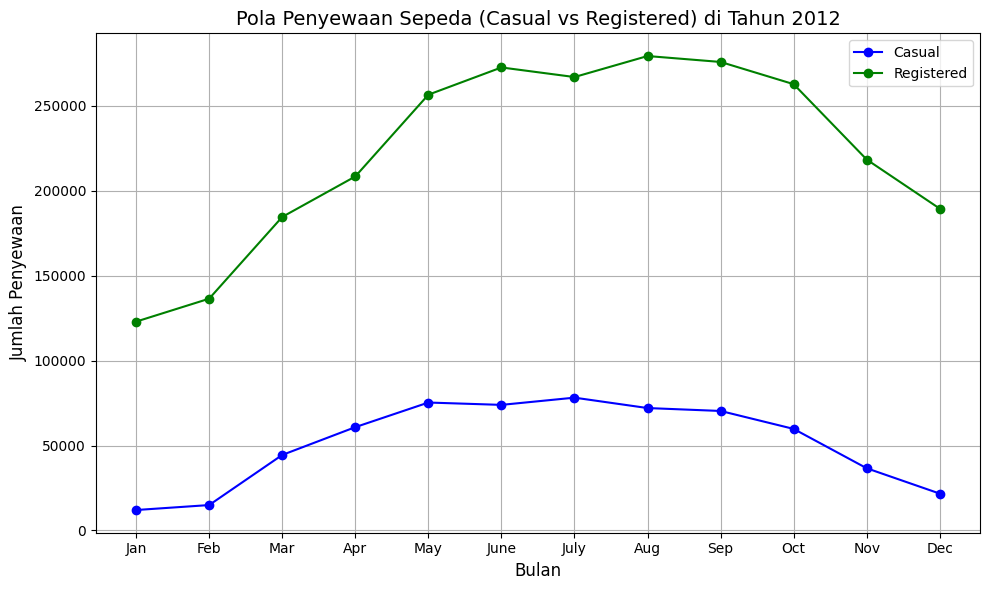

In [26]:
# Menghitung total penyewaan sepeda per bulan
day_df['month'] = pd.Categorical(
    day_df['month'],
    categories=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],
    ordered=True
)

# Menghitung total sewa per bulan untuk casual dan registered
monthly_sewa = day_df.groupby('month')[['casual', 'registered']].sum()

# memeriksa apakah kolom 'casual' dan 'registered' ada dalam data dan tidak kosong
print("Monthly Sewa Data:\n", monthly_sewa)

# Membuat line plot untuk customer casual dan registered dalam satu grafik
plt.figure(figsize=(10,6))

# Line plot untuk casual, pastikan datanya tersedia
if 'casual' in monthly_sewa.columns:
    plt.plot(monthly_sewa.index, monthly_sewa['casual'], label='Casual', color='blue', marker='o')

# Line plot untuk registered, pastikan datanya tersedia
if 'registered' in monthly_sewa.columns:
    plt.plot(monthly_sewa.index, monthly_sewa['registered'], label='Registered', color='green', marker='o')

# Memberi judul dan label yang sama untuk kedua plot
plt.title('Pola Penyewaan Sepeda (Casual vs Registered) di Tahun 2012', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Gambar diatas menunjukkan bahwa pola penyewaan sepeda pengguna casual lebih rendah dibandingkan pengguna terdaftar.

## Conclusion

- Conclution pertanyaan 1 :
Berdasarkan hasil visualisasi di atas, cuaca saat cerah/setengah berawan paling mendominasi dengan total 68.6% menunjukkan bahwa mayoritas pelanggan lebih nyaman untuk bersepeda, urutan kedua yaitu cuaca saat kabut sebesar 30.3% meskipun tidak sebesar cuaca cerah, tetapi memberikan kontribusi pengaruh terhadap pelanggan dalam menyewa sepeda, urutan ketiga yaitu cuaca saat salju ringan sebesar 1.2%, menunjukkan bahwa pelanggan cenderung mengurangi aktivitas bersepeda karena cuaca sedang ekstrem.  


- Conclution pertanyaan 2 :
Dari hasil visualisasi di atas, menunjukkan bahwa pola penyewaan sepeda pengguna casual cenderung rendah dibandingkan pengguna terdaftar. Puncak penyewaan pengguna casual mengalami peningkatan stabil dari Januari hingga Juli, lalu mengalami penurunan di Agustus hingga Desember. Puncak penyewaan pengguna terdaftar mengalami peningkatan drastis dari Januari hingga Juni, lalu mengalami penurunan secara bertahap hingga Desember.

In [27]:
pip freeze > requirements.txt